# Introduction to Machine Learning

This is the first session in our machine learning series. This session
will focus on introducing machine learning conceptually. We will first
discuss what machine learning is and why it is so powerful, then build a
simple model to predict passenger survival on the Titanic. The goal is
not to come away from this session with a complete, thorough
understanding of machine learning. Instead, the goal is to understand
what machine learning brings to the table.

## Slides

Use the left ⬅️ and right ➡️ arrow keys to navigate through the slides
below. To view in a separate tab/window,
<a href="slides.html" target="_blank">follow this link</a>.

## What is Machine Learning?

In analytics and data science, tasks often focus on explaining why
something happened or predicting what will happen in the future. Both of
these tasks are complex, but for different reasons. Predicting the
future is difficult because data can only tell us about the past. There
are a number of ways we can approach this problem, but in the NHS, we
often rely on dashboards that describe what has happened in the past to
inform decisions about the future. This is inherently limited because
many factors will cause the future to differ from the past, and
decision-making based on descriptions of the past relies heavily on
human judgment.

We can improve on human judgment using rules-based systems, which define
explicit rules (IF condition THEN action) to generate predictions[1].
This can be effective in simple contexts where the rules are already
known and easily quantified, but struggle with any complexity. Another
approach to making decisions about the future more robust is statistical
modelling; however, traditional statistical methods can struggle with
large numbers of variables, complex and unknown interactions, and
predictions that need to be automated and applied at scale.

This is where machine learning comes in. Machine learning is an approach
to building systems that learn patterns from data to make predictions
about the future. Fundamentally, machine learning is a blend of
statistics and software development, leveraging statistical methods and
applying software development principles to solve the problems of
complexity and scale. The result is systems that are highly effective at
predicting outcomes, can be applied at scale, and deployed in the real
world to have a meaningful impact on our decisions about the future.

Machine learning can be applied to a wide variety of contexts and can
work with all types of data, structured and unstructured[2]. In
healthcare, there are lots of examples where machine learning can be
very effective:

-   **Readmission Prediction** - Which patients need follow-up care?
-   **Diagnostic Support** - Which patients need further testing?
-   **Resource Allocation** - How many beds needed next week?
-   **Treatment Personalisation** - Which intervention works for whom?

## Predicting Survival on the Titanic

We will use a classic machine learning dataset, passenger data from the
Titanic, to demonstrate what a simple model looks like and how machine
learning works. The task is to predict passenger survival. This is a
type of task called **supervised learning**, where you train a model on
data where the outcome is already known and labelled, in order to
predict answers on new data for which the outcome is not known.

For example, predicting future readmissions from patient data that has
an outcome variable that tells us whether patients were readmitted or
not is a supervised learning task.

The basic machine learning workflow, which will be demonstrated below,
looks as follows:

1.  **Get data** with examples and labels
2.  **Split** into training and testing sets
3.  **Train** a model on training data
4.  **Predict** on test data
5.  **Evaluate** how well it performed

### Setup

First, let’s import the libraries we need, and the titanic dataset.

[1] For example, a rules-based system that classifies patients by their
risk-levels might identify a patient over the age of 65 with diabetes
and apply a flag to their record that tells clinicians that the patient
is high-risk.

[2] Structured data, also known as tabular data, is any data that can
easily fit into a table, with columns representing variables and rows
representing different observations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# set random seed for reproducibility
np.random.seed(42)

In [2]:
# load the titanic dataset
df = sns.load_dataset('titanic')

### Data Exploration

Before building our model we should explore the data to help us make
decisions about how to transform the data so it is ready for modelling
and how to structure our model.

In practice, the exploratory phase should be much more detailed, but
here we will keep it simple and focus on demonstrating the basic machine
learning workflow.

In [3]:
# inspect first few rows
df.head()

In [4]:
# check data shape (rows, columns)
df.shape

(891, 15)

In [5]:
# count missing values
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

There are several columns that have a lot of missing values. If we use
any of these variables (often called features in machine learning) in
our model, we will need to deal with these nulls.

It’s also important to check the distribution of the outcome, to
identify significant imbalance.

In [6]:
# count survivors vs non-survivors
df['survived'].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

We can also calculate the rate of survival to build a simple baseline to
compare our model against.

In [7]:
# calculate survival rate
print(f"Survival rate: {df['survived'].mean():.1%}")

Survival rate: 38.4%

If we always predicted that passengers did not survive, we’d be right
about 62% of the time. Our model needs to be able to beat this to add
value.

### Data Preparation

To keep the model simple, we will use only four features: passenger
class, sex, age, and fare.

We will first split our data up into these four features (`X`) and the
outcome, passenger survival (`y`), and then we will split `X` and `y`
into our training and testing data.

This is a critical step in a machine learning workflow because it
creates a process for honest evaluation of the model’s performance. The
model uses the training data to learn patterns that help it predict
outcomes, and the test data is used to check how the model performs on
data it hasn’t seen in the training process.

In [8]:
X = df[['pclass', 'sex', 'age', 'fare']]
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

Several of the features in our model need to be transformed so that the
model can use them. We will write a function that fills the missing
values in the age column with the median age[1], and converts the sex
column to integer type. We then apply this function to both the training
and testing features.

[1] Replacing missing values with the mean or median, or dropping
missing values entirely, is generally a bad strategy that can have a
significant negative impact on your model. However, we are using the
median here for the sake of simplicity.

In [9]:
def prepare_features(data):

    # fill missing age values with the median age
    data['age'] = data['age'].fillna(data['age'].median())
    # convert sex to integer (male = 0, female = 1) 
    data['sex'] = (data['sex'] == 'female').astype(int)

    return data

X_train = prepare_features(X_train)
X_test = prepare_features(X_test)

### Model Training

Logistic regression is a simple, interpretable model which is good for
binary classification, so that is what we will use here.

In [10]:
# specify and train the model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

The process for fitting a machine learning model is actually remarkably
simple. It’s just two lines!

#### Predictions

Having fit our model on the training data, we can then predict passenger
survival in the test data, to see how our model performs on unseen data.

In [11]:
# predict on test set
y_pred = clf.predict(X_test)

# look at first ten predictions vs actual
pd.DataFrame({
    'Actual': y_test.values[:10],
    'Predicted': y_pred[:10]
})

Looking at the first ten predictions, we can already see the model is
not perfect, but it seems to be performing pretty well.

#### Model Evaluation

Having generated predictions, we need to evaluate how well the model
performed. There are lots of different metrics we can use to evaluate
model performance. The simplest metric is **accuracy**[1], which tells
us what percentage of predictions were correct.

[1] We will look at other metrics and when we should use them in the
future.

In [12]:
# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.1%}")

Accuracy: 79.5%

Our model performs pretty well, and it is significantly better than the
baseline we calculated earlier. But accuracy alone doesn’t tell the
whole story.

We also need to consider the types of errors our model makes. False
positives (predicting a passenger will survive when they won’t) and
false negatives (predicting a passenger won’t survive when they will)
have different costs and implications. Understanding which type of error
is more costly in a given context helps us evaluate whether our model is
fit for purpose.

<Figure size 1152x576 with 0 Axes>

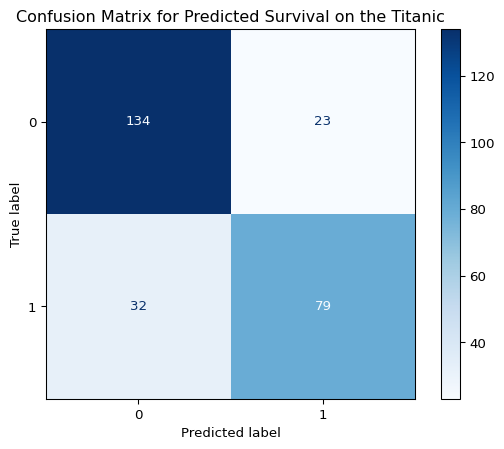

In [13]:
# generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# plot confusion matrix
plt.figure(figsize=(12,6))

disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap=plt.cm.Blues)

plt.title("Confusion Matrix for Predicted Survival on the Titanic")
plt.show()

The confusion matrix above shows the breakdown of correct and incorrect
predictions. The top-left box shows true negatives (correctly predicted
did not survive), the bottom-right shows true positives (correctly
predicted survived), and the off-diagonal boxes show our errors: false
positives (top-right) and false negatives (bottom-left). This breakdown
helps us understand not just how often our model is wrong, but how it’s
wrong, which is important for deciding whether the model is good enough
for real-world use.

Our model has a slightly higher number of false negatives, which
suggests it is undervaluing the probability of some passengers
surviving. Our next steps would be understanding the observations where
our model fails (perhaps it struggles with the rows that had missing age
values?), and iterating on this workflow to improve our model’s
performance.

### Summary

In this session, we’ve introduced machine learning conceptually and
demonstrated a basic supervised learning workflow. Machine learning
allows us to build systems that learn patterns from data to make
predictions at scale, handling complexity that would overwhelm
traditional rules-based systems or simple statistical approaches.

The workflow we followed is the foundation of most supervised learning
tasks: get labeled data, split it into training and testing sets, train
a model on the training data, make predictions on the test data, and
evaluate performance. This split between training and testing is
critical because it gives us an honest assessment of how the model
performs on data it hasn’t seen before. We also looked at how to
evaluate model performance. There are many ways we can build on this
workflow to make it more robust and improve model performance.

What we haven’t covered yet is how different models actually learn, why
you might choose one model over another, and how to improve performance
through feature engineering and hyperparameter tuning. We also haven’t
explored other types of machine learning beyond supervised learning, or
the full workflow that takes a model from development to deployment.
These topics will be covered in the futures, building on the foundations
we’ve laid out here.